In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import Model 
from tensorflow.keras.applications.inception_v3 import InceptionV3





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
train_dir = ('/content/drive/MyDrive/dataset25s/train')
val_dir = ('/content/drive/MyDrive/dataset25s/val')
test_dir = ('/content/drive/MyDrive/dataset25s/test')

In [18]:
IMAGE_SIZE = 155
BATCH_SIZE = 12

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2

) 

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range = 0.2,
        height_shift_range = 0.2,
       )


train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)

valid_gen = valid_datagen.flow_from_directory(
    val_dir,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    class_mode='categorical',
    color_mode= "rgb",
)
    


Found 454 images belonging to 3 classes.
Found 226 images belonging to 3 classes.


In [19]:
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')


In [20]:
for layer in base_model.layers:
    layer.trainable = False

for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 conv2d_188 False
2 batch_normalization_188 False
3 activation_188 False
4 conv2d_189 False
5 batch_normalization_189 False
6 activation_189 False
7 conv2d_190 False
8 batch_normalization_190 False
9 activation_190 False
10 max_pooling2d_8 False
11 conv2d_191 False
12 batch_normalization_191 False
13 activation_191 False
14 conv2d_192 False
15 batch_normalization_192 False
16 activation_192 False
17 max_pooling2d_9 False
18 conv2d_196 False
19 batch_normalization_196 False
20 activation_196 False
21 conv2d_194 False
22 conv2d_197 False
23 batch_normalization_194 False
24 batch_normalization_197 False
25 activation_194 False
26 activation_197 False
27 average_pooling2d_18 False
28 conv2d_193 False
29 conv2d_195 False
30 conv2d_198 False
31 conv2d_199 False
32 batch_normalization_193 False
33 batch_normalization_195 False
34 batch_normalization_198 False
35 batch_normalization_199 False
36 activation_193 False
37 activation_195 False
38 activation_198 False
39 activation

In [21]:
from tensorflow.keras import layers 
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(3, activation='softmax')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])


Epoch 1/30
38/38 [==============================] - 10s 272ms/step - loss: 0.2526 - acc: 0.8943 - val_loss: 1.3420 - val_acc: 0.5531
Epoch 2/30
38/38 [==============================] - 10s 275ms/step - loss: 0.2220 - acc: 0.9163 - val_loss: 1.6097 - val_acc: 0.5487
Epoch 3/30
38/38 [==============================] - 10s 277ms/step - loss: 0.2326 - acc: 0.9119 - val_loss: 1.7357 - val_acc: 0.5575
Epoch 4/30
38/38 [==============================] - 10s 275ms/step - loss: 0.2757 - acc: 0.8965 - val_loss: 1.6059 - val_acc: 0.5265
Epoch 5/30
38/38 [==============================] - 10s 274ms/step - loss: 0.2073 - acc: 0.9163 - val_loss: 1.7244 - val_acc: 0.5531
Epoch 6/30
38/38 [==============================] - 10s 271ms/step - loss: 0.2395 - acc: 0.9141 - val_loss: 1.4958 - val_acc: 0.5487
Epoch 7/30
38/38 [==============================] - 10s 273ms/step - loss: 0.1894 - acc: 0.9251 - val_loss: 1.4120 - val_acc: 0.5531
Epoch 8/30
38/38 [==============================] - 10s 274ms/step - 

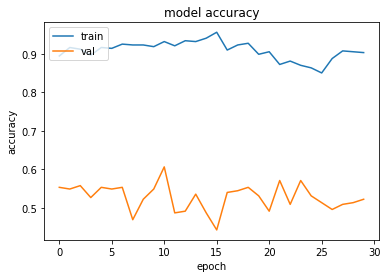

In [23]:
from matplotlib import pyplot as plt

history = model.fit(train_gen,epochs = 30,validation_data = valid_gen)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255)


test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    class_mode='categorical'
)


pred = model.predict_generator(test_gen, steps=10, verbose=1)

Found 115 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


10/10 [==============================] - 31s 3s/step


In [ ]:
final_loss, final_acc = model.evaluate(valid_gen, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 1.109834, final accuracy: 0.642202


In [ ]:
predicted_class = np.argmax(pred,axis=1)


In [ ]:
l = dict((v,k) for k,v in train_gen.class_indices.items())
prednames = [l[k] for k in predicted_class]


In [ ]:
filenames = test_gen.filenames


In [ ]:
import pandas as pd
finaldf = pd.DataFrame({'Filename': filenames,'Prediction': prednames})


In [ ]:
finaldf.to_csv("pred25s.csv")